In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


<h1> IMPORTING LIBRARIES</h1>

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h1>TRAIN AND TEST DATASETS</h1>

In [116]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>EDA</h1> 

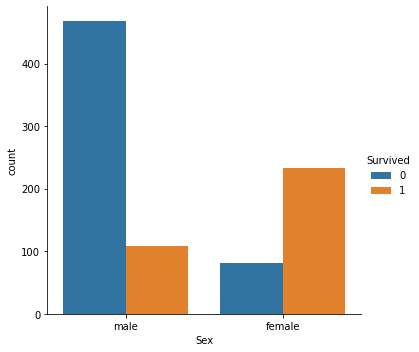

In [119]:
# Countplot 
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train) 

After observing the above graph, we can say women have survived more than man, so we can say that 

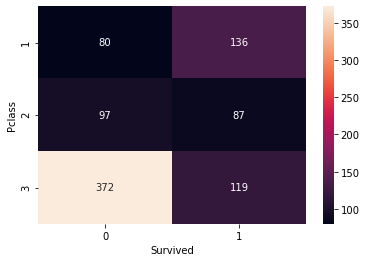

In [120]:
#HeatMap for Passanger class and number of people survived
group = train.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

By this plot we can say that class 1 people have more survival rate than the class2 & class3 peoples,
this says that the Pclass feature plays an important role to pridicting the Survival.

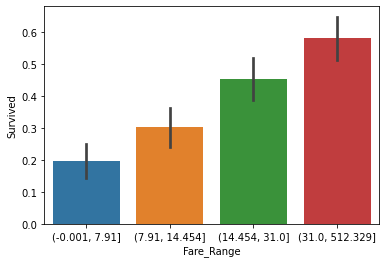

In [121]:
#Plotting fare feature on survival BarPlot

# Divide Fare into 4 range
train['Fare_Range'] = pd.qcut(train['Fare'], 4) 
sns.barplot(x ='Fare_Range', y ='Survived', data = train)

Seeing this plot we conclude that more fair paid have the high chance to survive, 

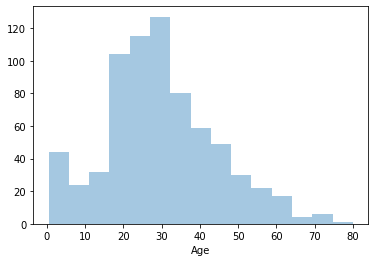

In [122]:
#plotting for Age
sns.distplot(train['Age'].dropna(), bins=15, kde=False)

Many passensgers are of age 15-40 yrs, are likely to survive

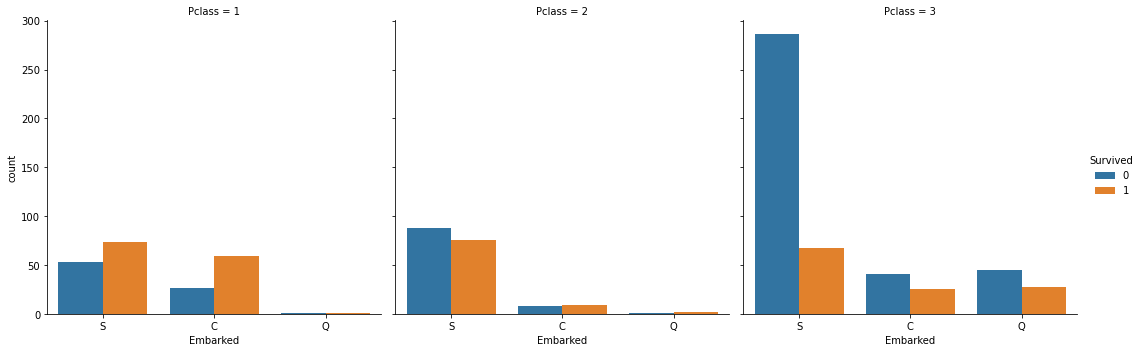

In [123]:
#plotting for Embarked feature
# Countplot 
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train)

**Some notable observations are:**

* Majority of the passengers boarded from S. 

* Majority of class 3 passengers boarded from Q.

# Overall Conclusions from EDA:


1. Women survived more than men.
2. Class 1 passengers were more lucky than Class 2 and 3.
3. Unfortunately, Class 3 was most affected.
4. Survival rate is more for passengers who paid higher fare.
5. Most of the passangers were of age between 20-40.
6. Majority of the passengers were boarded from 'S'.

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]"


**Drop Unnecessary features which does not contribute in final output**

In [125]:
extra_eda_cols = ['SibSp', 'Parch','Fare_Range','PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin']
train = train.drop(extra_eda_cols, axis = 1, inplace = False)
train.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [126]:
x_train = train.drop('Survived', axis = 1, inplace = False)
print(x_train)

     Pclass     Sex   Age Embarked
0         3    male  22.0        S
1         1  female  38.0        C
2         3  female  26.0        S
3         1  female  35.0        S
4         3    male  35.0        S
..      ...     ...   ...      ...
886       2    male  27.0        S
887       1  female  19.0        S
888       3  female   NaN        S
889       1    male  26.0        C
890       3    male  32.0        Q

[891 rows x 4 columns]


**Checking the missing values**

In [127]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

'Age' has 177 and 'Embarked' has 2 missing values.

### Filling the missing values column by column using scikit-learn.

In [128]:
#For 'Age' column

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[['Age']])
x_train[['Age']]= imputer.transform(x_train[['Age']])


#For 'Embarked' column

imputers = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputers.fit(x_train[['Embarked']])
x_train[['Embarked']]= imputers.transform(x_train[['Embarked']])

In [129]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

As we see, now there is not any missing value in any column.

# Encoding Categorical Data 

In [130]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
x_train['Sex']= label_encoder.fit_transform(x_train['Sex']) 
x_train['Embarked']= label_encoder.fit_transform(x_train['Embarked'])

In [131]:
x_train.head()

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2


In [132]:
extraColumn=['Pclass','Sex','Age','Embarked']
y_train=train.drop(extraColumn,axis=1,inplace=False)
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [133]:
#feature Scaling on train data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

## Preprocessing on TEST Dataset

In [134]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Checking for missing values

In [135]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'Cabin' has maximum number of missing values. 'Age' column also have many NaN values and 'Fare' cloumn has 1 missing value.

## Filling missing values column by column

In [136]:
#For 'Age' column

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(test[['Age']])
test[['Age']]= imputer.transform(test[['Age']])

# Dropping unnecessary columns

In [137]:
extra_cols_test = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
test = test.drop(extra_cols_test, axis = 1, inplace = False)
test.head()

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S


# Encoding Categorical Data

In [138]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 


#Sex Column  
test['Sex']= label_encoder.fit_transform(test['Sex']) 

#Embarked Column
test['Embarked']= label_encoder.fit_transform(test['Embarked'])

In [139]:
test.head()

,Pclass,Sex,Age,Embarked
0,3,1,34.5,1
1,3,0,47.0,2
2,2,1,62.0,1
3,3,1,27.0,2
4,3,0,22.0,2


In [140]:
#Featur Scaling on test data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
test = sc_x.fit_transform(test)

# Building Various Classification Models

## Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [142]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

0.7890262172284644

## KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

0.8047315855181024

## Decision Tree Classifier

In [145]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(test)

In [146]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

0.7935955056179775

## Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [148]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

0.8037078651685393

## SVC

In [149]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [150]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

0.8226591760299625

In [151]:
#creating dataframe
accuracy = {'Model' : ['Logistic Regression', 'K- Nearest Neighbor', 'SVC', 'Decision Tree', 'Random Forest'],
                  'Accuracy' : [0.7890, 0.8047, 0.8226, 0.7935, 0.8037]
                 }
allScores = pd.DataFrame(accuracy, columns = ['Model', 'Accuracy'])
allScores.head()

,Model,Accuracy
0,Logistic Regression,0.7890
1,K- Nearest Neighbor,0.8047
2,SVC,0.8226
3,Decision Tree,0.7935
4,Random Forest,0.8037


Alright as we can see, '**SVC**' has highest score. So, here we have best model.

In [152]:
test_df = pd.read_csv('../input/titanic/test.csv')
submit = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred
})
submit.to_csv('titanic_prediction.csv', index=False)
print('File Saved')

File Saved


In [153]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
